In [1]:
import sys

sys.path.append('../..')


import app.agent.agent_graph as agent_graph

In [2]:
from app.llm_services import LLM_Model
from app.embeddings.base_embedding_store import EmbeddingStore
from app.embeddings.embedding_services import EmbeddingModel
from app.tools import GenerateFunction, MapQuestionToSchema
from pyTigerGraph import TigerGraphConnection

In [3]:
app = agent_graph.TigerGraphAgentGraph(
    LLM_Model({}),
    TigerGraphConnection(),
    EmbeddingModel({"authentication_configuration": {}}, ""),
    EmbeddingStore,
    MapQuestionToSchema(TigerGraphConnection(), LLM_Model({}), ""),
    GenerateFunction(TigerGraphConnection(), LLM_Model({}), "", EmbeddingModel({"authentication_configuration": {}}, ""), EmbeddingStore)
).create_graph()

In [4]:
app.get_graph().print_ascii()

                                      +-----------+                           
                                      | __start__ |                           
                                      +-----------+                           
                                            *                                 
                                            *                                 
                                            *                                 
                                        +-------+                             
                                      ..| entry |**                           
                                ......  +-------+  ******                     
                           .....            .            ******               
                     ......                  .                 *****          
                  ...                        .                      ******    
+------------------------+                   .      

In [5]:
png = app.get_graph().draw_mermaid_png()

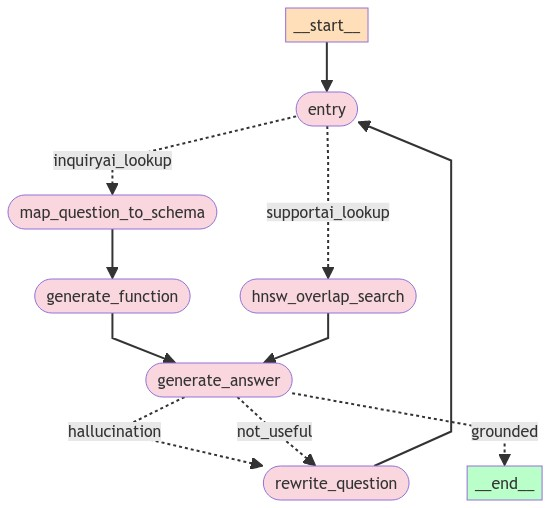

In [6]:
from IPython.display import Image
Image(png)